In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

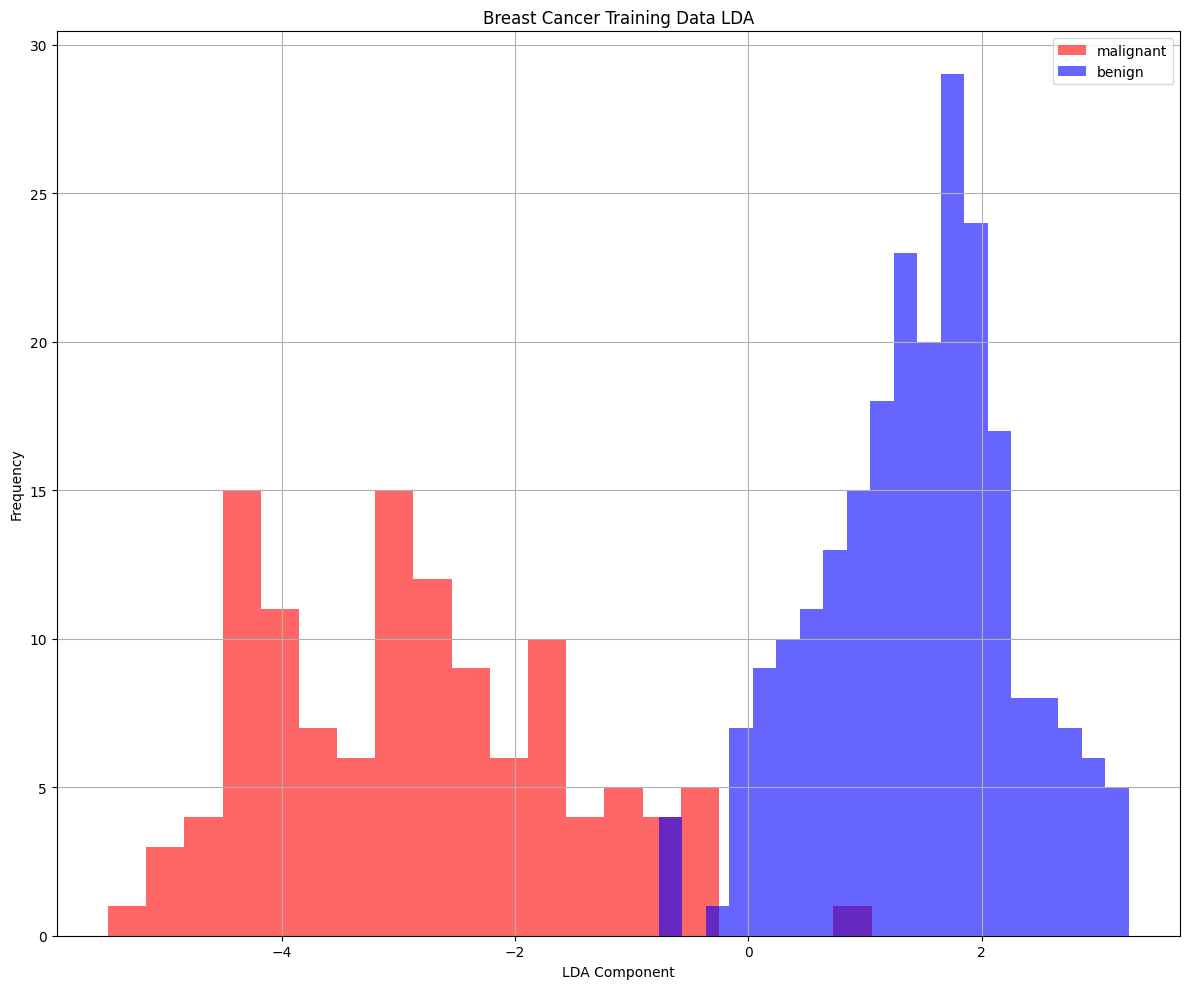

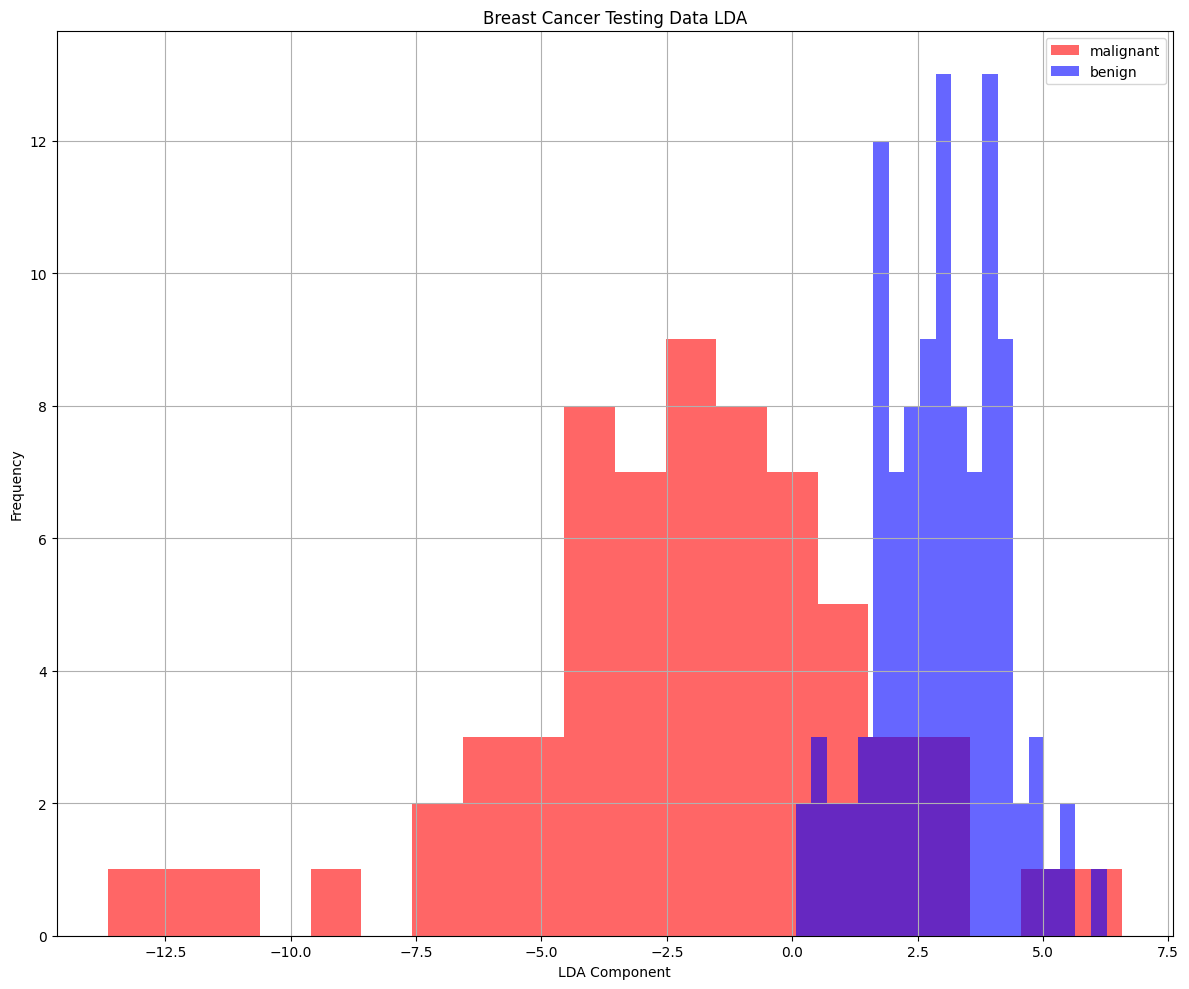

[I 2025-04-27 13:00:32,437] A new study created in memory with name: no-name-51d8ff8b-3185-403a-9872-66ff50c861b2
[I 2025-04-27 13:00:49,488] Trial 0 finished with value: 0.9829778672032194 and parameters: {'n_estimators': 3116, 'max_depth': 12, 'learning_rate': 0.0023153319500808455, 'subsample': 0.5141250328335303, 'colsample_bytree': 0.5473655959558704, 'gamma': 3.0676708310510215, 'reg_alpha': 7.499916434689812e-08, 'reg_lambda': 2.1125713569389373e-05}. Best is trial 0 with value: 0.9829778672032194.
[I 2025-04-27 13:01:08,361] Trial 1 finished with value: 0.9802012072434607 and parameters: {'n_estimators': 2882, 'max_depth': 10, 'learning_rate': 0.03581788832392376, 'subsample': 0.7107757609453597, 'colsample_bytree': 0.5787563694573815, 'gamma': 4.047212648878304, 'reg_alpha': 8.009788527171322e-07, 'reg_lambda': 0.05863014725857198}. Best is trial 0 with value: 0.9829778672032194.
[I 2025-04-27 13:01:50,363] Trial 2 finished with value: 0.9830181086519115 and parameters: {'n_es

Best trial:
Accuracy: 0.991549295774648
Best hyperparameters:  {'n_estimators': 8679, 'max_depth': 11, 'learning_rate': 0.19826017154667774, 'subsample': 0.6582124928787043, 'colsample_bytree': 0.8989090897104828, 'gamma': 0.27263080332740164, 'reg_alpha': 1.2854203240266045e-05, 'reg_lambda': 1.6331526121070527e-07}


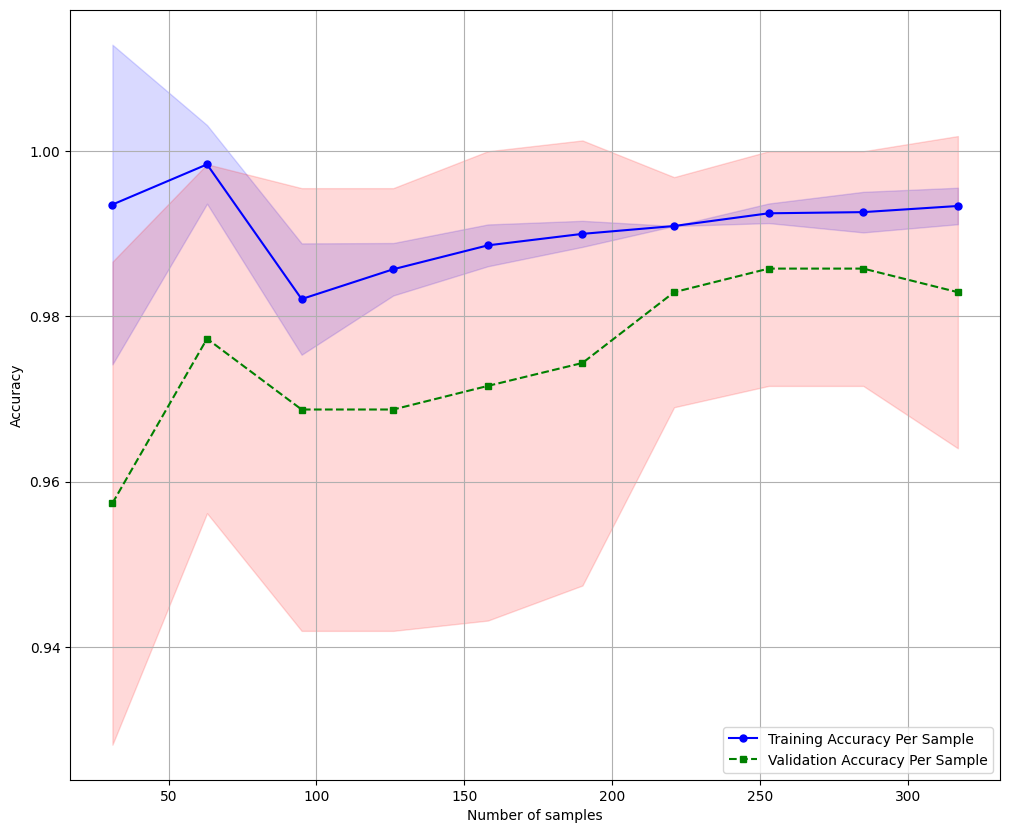

Confusion Matrix
[[ 46  18]
 [  0 107]]
Accuracy: 0.8947, Precision: 0.8560, Recall: 1.0000, F1: 0.9224, AUC: 0.9150


In [2]:
outlier_params = {'n_estimators': 1000, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'if', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)